## Disclaimer
The repository is still under developments and not ready to use. It made
public to share the progress between collaborators. 

## Currnt limitations
Currently only dictionary, biblographic data, and list of reactions are converted
and stored in the database on MongoDb culuster service. Note that the
specification of JSON schema is under consideration, so please be
informed that the data structure would be changed without any
notifications.

## Collections
The name of collections, which is like a data table in the SQL database, are as follows.

- dictiondef: dictionary index
- dictionary: dictionary data
- entry: biblographic data
- data: data body (Simple translation from EXFOR to JSON. The
  separation of dataset based on the pointer has taken into account.)
- reaction_index: all reactions

### Collection: dictionary and dictiondef
For dictionary, please refere the information
[here](https://github.com/shinokumura/exforparser/tree/main/dictionary).
In this example, the retrieval examples of biblographic data and list of
reactions will be explained. 

### Collection: entry
The bibliographic data includes following information

- title: string
- entry_number: string
- reference: array
- authors: array
- institutes: array
- facilities: array
- reactions: array
- experimental_conditions: array

, where ``experimental_conditions`` includes other meta data in the first
SUBENTRY and ``reactions`` includes all reactions in the entire ENTRY,
which are stored in the collection named ``entry``.


### Collection: data
The data includes following information. This is the direct and simple
conversion from EXFOR to JSON. Only the dataset-wise separation based on the
pointer is taken into account.

- id: string (entry number + subentry number + pointer)
- reaction: object
- measurement_condition: object
- common_data: array
- data_table: array

, where ``measurement_condition`` includes other meta data in this
particular SUBENTRY, ``common_data`` and ``data_table`` include the
datatable of COMMON and DATA blocks.


### Collection: reaction_index
The ``reaction_index`` collection composes of following columns. The column could be None
or np.Nan either if the data parse was failed or simply there is no data.
Temporary ``XX`` string is used for the pointer if no pointer is given.
Note that the pointer coded only with REACTION is taken into account,
since the pointer coded with other identifieres are meaningless in many cases.

```
        id  entry subentry pointer  year       author  min_inc_en  max_inc_en points     target     process            sf4       residual   sf5      sf6   sf7    sf8   sf9
C0290009XX  C0290      009      XX  1981    R.A.Cecil   3.370e-04   3.370e-04      1   13-AL-27  10-NE-20,X         0-NN-1         0-NN-1  None    DA/DE  None   None  None
E1773008XX  E1773      008      XX  2002     T.Wakasa   3.450e+02   3.450e+02      1   20-CA-40         P,X         0-NN-1         0-NN-1  None    DA/DE  None   None  None
411280022   41128      002       2  1993 V.A.Anufriev         NaN         NaN      0  98-CF-250       N,TOT           None           None  None      WID  None   None  None
E2617012XX  E2617      012      XX  2019     T.Murata   3.270e+01   5.040e+01     15    39-Y-89         A,X        39-Y-87        39-Y-87  None      SIG  None   None  None
G0018003XX  G0018      003      XX  2010  Md.S.Rahman   5.000e+01   7.000e+01      3    49-IN-0         G,X  49-IN-111-G/M  49-IN-111-G/M  None  SIG/RAT  None    BRA  None
21909005XX  21909      005      XX  1979   H.Yamamoto   1.450e+01   1.450e+01      1   92-U-238         N,F           MASS          A=110   SEC       FY  None   None  None
E1434007XX  E1434      007      XX  1983  M.Takahashi   5.190e+01   5.190e+01      1  82-PB-208         P,T      82-PB-206      82-PB-206   PAR       DA  None   None  None
D6158002XX  D6158      002      XX  2008   R.Tripathi   7.000e+01   1.000e+02    169    39-Y-89    9-F-19,X           ELEM              C  None       DA  None   None  None
 120970097  12097      009       7  1960   H.B.Moller         NaN         NaN      0  64-GD-155       N,TOT           None           None  None      WID  None  SQ/S0  None
O0920008XX  O0920      008      XX  2001   J.Kuhnhenn   6.660e+01   6.660e+01      1    82-PB-0         P,F    47-AG-110-M    47-AG-110-M   IND      SIG  None   None  None
D0635002XX  D0635      002      XX  2003     W.Krolas   3.500e+02   3.500e+02      1  82-PB-208  28-NI-64,X      ELEM/MASS      47-Ag-110  None      SIG  None   None  None
D0635002XX  D0635      002      XX  2003     W.Krolas   3.500e+02   3.500e+02      1  82-PB-208  28-NI-64,X      ELEM/MASS      82-Pb-199  None      SIG  None   None  None
M06350212   M0635      021       2  2003 V.V.Varlamov   1.980e+01   2.760e+01     27    23-V-51        G,2N        23-V-49        23-V-49  None      SIG  None   None  EVAL
```
## Examples
There are two ways to retrive data from MongoDb, (1) via MongoDb API and (2) via
MongoClient Python package.

### (1) via API
First example is to retrive data via API that MongoDB culuster service naturally suports.
In this way, user can retrive data either through Python code or curl
command. There are two endpoints, ``action/findOne`` and
``action/find``. Please refere the [MongoDb API
reference](https://www.mongodb.com/docs/atlas/api/data-api-resources/)
for details. First, import the libraries and url.

In [5]:
import requests
import json
import pandas as pd
import sys
sys.path.append("../")
from path import MONGOBASE_URI, API_KEY

headers = {
    'Content-Type': 'application/json',
    'Access-Control-Request-Headers': '*',
    'api-key': API_KEY
}

#### Example of the endpoint: POST /action/findOne

In [6]:
# retrieval of dictionary info
url = MONGOBASE_URI + "action/findOne"
payload = json.dumps(
    {
        "collection": "dictionary",
        "database": "exfor",
        "dataSource": "exparser",
        "filter": {"diction_num": "21"}, # METHOD
        "projection": {"_id": 0, "diction_num": 1, "diction_def": 1, "parameters": 1},
    }
)
response = requests.request("POST", url, headers=headers, data=payload)
print(json.dumps(response.json(), indent=1))

{
 "document": {
  "diction_num": "21",
  "diction_def": "Methods",
  "parameters": [
   {
    "parameter": "ACTIV",
    "description": "Activation",
    "active": true
   },
   {
    "parameter": "AMS",
    "description": "Accelerator Mass Spectrometry",
    "active": true
   },
   {
    "parameter": "ASEP",
    "description": "Off-Line Mass Separation Of A Product",
    "active": true
   },
   {
    "parameter": "ASPEC",
    "description": "Alpha Spectrometry",
    "active": true
   },
   {
    "parameter": "ASSOP",
    "description": "Associated Particle",
    "active": true
   },
   {
    "parameter": "BCINT",
    "description": "Beam Current Integrated",
    "active": true
   },
   {
    "parameter": "BGCT",
    "description": "Beta-Gamma Coincidence Technique",
    "active": true
   },
   {
    "parameter": "BSPEC",
    "description": "Beta Ray Spectrometry",
    "active": true
   },
   {
    "parameter": "CHARG",
    "description": "Measurements In Gas Discharge",
    "active": 

In [7]:
# retrieval of one entry's bib data
url = MONGOBASE_URI + "action/findOne"
payload = json.dumps(
    {
        "collection": "entry",
        "database": "exfor",
        "dataSource": "exparser",
        "filter": {"entry_number": "22726"}, # entry number
        "projection": {"_id": 0},
    }
)
response = requests.request("POST", url, headers=headers, data=payload)
print(json.dumps(response.json(), indent=1))

{
 "document": {
  "title": ".Neutron Scattering From The Gd-155,156,157,158,160  Isotopes-Measurements And Analyses With A Deformed,  Semimicroscopic Optical Model.",
  "references": [
   {
    "x4code": "(J,PR/C,61,034306,2000)",
    "publication year": "2000"
   },
   {
    "x4code": "(J,PR/C,14,933,1976)",
    "publication year": "1976"
   }
  ],
  "authors": [
   {
    "name": "E.Bauge"
   },
   {
    "name": "J.P.Delaroche"
   },
   {
    "name": "M.Girod"
   },
   {
    "name": "G.Haouat"
   },
   {
    "name": "J.Lachkar"
   },
   {
    "name": "Y.Patin"
   },
   {
    "name": "J.Sigaud"
   },
   {
    "name": "J.Chardine"
   }
  ],
  "institutes": [
   {
    "x4code": "2FR BRC"
   }
  ],
  "#doi": [],
  "facilities": [
   {
    "type": "VDGT",
    "x4code": "2FR BRC"
   }
  ],
  "entry_number": "22726",
  "reactions": {
   "002": {
    "XX": {
     "x4code": "(64-GD-155(N,EL)64-GD-155,,DA)",
     "target": "64-GD-155",
     "process": "N,EL",
     "sf4": "64-GD-155",
     "res

In [8]:
url = MONGOBASE_URI + "action/findOne"
payload = json.dumps(
    {
        "collection": "data",
        "database": "exfor",
        "dataSource": "exparser",
        "filter": {"id": "C1874-013-XX"}, # entrynumber + subentry number + pointer (XX for without pointer)
        "projection": {"_id": 0},
    }
)
response = requests.request("POST", url, headers=headers, data=payload)
print(json.dumps(response.json()["document"]["data_table"], indent=1))

TypeError: 'NoneType' object is not subscriptable

['EV', 'B', 'B', 'PER-CENT', 'PER-CENT']
            EN      DATA   ERR-S  ERR-SYS  ERR-4
0     43700000  0.000319  0.0002      4.6      1
1     47900000  0.001010  0.0004      4.6      1
2     52500000  0.000699  0.0004      4.6      1
3     57600000  0.001670  0.0006      4.6      1
4     63200000  0.001820  0.0006      4.6      1
5     69300000  0.004110  0.0009      4.6      1
6     75900000  0.005050  0.0010      4.6      1
7     83300000  0.006510  0.0010      4.6      1
8     91300000  0.006730  0.0010      4.6      1
9    100000000  0.010700  0.0020      4.6      1
10   110000000  0.011300  0.0020      4.9      2
11   120000000  0.016900  0.0020      4.9      2
12   132000000  0.018300  0.0020      4.9      2
13   145000000  0.019800  0.0030      4.9      2
14   159000000  0.023200  0.0030      4.9      2
15   174000000  0.027300  0.0030      4.9      2
16   191000000  0.032100  0.0030      4.9      2
17   209000000  0.036200  0.0040      4.9      2
18   229000000  0.040000  0.

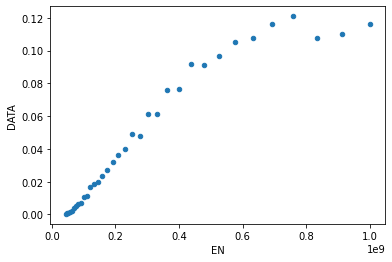

In [ ]:
import matplotlib.pyplot as plt

url = MONGOBASE_URI + "action/findOne"
payload = json.dumps(
    {
        "collection": "data",
        "database": "exfor",
        "dataSource": "exparser",
        "filter": {"id": "23151-007-XX"}, # entrynumber + subentry number + pointer (XX for without pointer)
        "projection": {
        "_id":0, 
         "data_table.heads":1, 
         "data_table.units":1, 
         "data_table.data":1
        },
    }
)
response = requests.request("POST", url, headers=headers, data=payload)
# print(json.dumps(response.json(), indent=1))
d = response.json()["document"]["data_table"]
print(d["units"])
dict = {d["heads"][i]: d["data"][str(i)]  for i in range(len(d["heads"]))}
df = pd.DataFrame(dict,  index=None)
print(df)

df.plot(x ="EN", y="DATA", kind="scatter")
plt.show()


#### Example of the endpoint: POST /action/find

In [ ]:
url = MONGOBASE_URI + "action/find"
payload = json.dumps(
    {
        "collection": "entry",
        "database": "exfor",
        "dataSource": "exparser",
        "filter": { "entry_number": "E2542"}
    }
)
response = requests.request("POST", url, headers=headers, data=payload)
print(response.text)

## store into dataframe
# df = pd.DataFrame(list(response.json()))
# print(df)

In [ ]:
url = MONGOBASE_URI + "action/find"
payload = json.dumps(
    {
        "collection": "reaction_index",
        "database": "exfor",
        "dataSource": "exparser",
        # "filter": { "entry": {"$eq": "G0071"} },
        "filter": { "target": {"$eq": "82-PB-0"}, "process": {"$eq": "N,F"} },
        "projection": {"_id":0, "id":1, "author":1, "year":1, "target":1, "process":1, "sf4":1, "residual":1, "max_inc_en":1, "points":1}
        # "projection": {"_id":0}
    }
)
response = requests.request("POST", url, headers=headers, data=payload)
a = response.json()

if a.get("error"):
    print(a)
else:
    ## this request returns data in { "documents": [] } format
    df = pd.DataFrame(a["documents"])
    print(df)

           id  year          author  max_inc_en  points   target process  \
0  23078005XX  2007         R.Nolte      199.00       4  82-PB-0     N,F   
1  30519002XX  1976        R.H.Iyer       14.00       1  82-PB-0     N,F   
2  41212009XX  1956  V.I.Goldanskii      380.00       1  82-PB-0     N,F   
3  23151007XX  2011        D.Tarrio     1000.00      35  82-PB-0     N,F   
4  22882009XX  2004     A.N.Smirnov      173.30       8  82-PB-0     N,F   
5   229030071  2006      I.V.Ryzhov      173.90       9  82-PB-0     N,F   
6   229030072  2006      I.V.Ryzhov      173.90       9  82-PB-0     N,F   
7  40844002XX  1984  P.E.Vorotnikov       23.30       4  82-PB-0     N,F   
8  41658004XX  2018    A.S.Vorobyev      206.20       8  82-PB-0     N,F   
9  41455014XX  2002   O.Shcherbakov      196.15      37  82-PB-0     N,F   

    sf4 residual  
0  None     None  
1  None     None  
2  None     None  
3  None     None  
4  None     None  
5  None     None  
6  None     None  
7  None    

### (2) via MongoClient

First, import the packages and establish the connection to MongoDb cloud service

In [ ]:
import pandas as pd
import plotly.express as px
from pymongo import MongoClient
import json
import sys
sys.path.append("../")
from path import DB_KEY

client = MongoClient("mongodb+srv://" + DB_KEY + "@exparser.b4gi6.mongodb.net/exfor?retryWrites=true&w=majority")
db = client.exfor

In [ ]:
collection = db.data
for x in collection.find(
    {"id": {"$regex": ".*-.*"}},
    # {"id": {"$regex": "20302002XX"}},
    {"_id":1, "id":1 }
    ):
    print(x)
    # newid = x["id"].replace("-","")
    # collection.update_one(
    #     {"_id": x["_id"] },
    #     {"$set" : {"id": newid}}
    # )
    

#### Example of db.collection.findOne()

In [ ]:
## https://pymongo.readthedocs.io/en/stable/tutorial.html#getting-a-single-document-with-find-one/
collection = db.dictionary
one = collection.find_one({ "diction_num": "21"}, {"_id": 0, "parameters":1})
for i in range(len(one["parameters"])):
    print(one["parameters"][i])


In [ ]:
## https://www.mongodb.com/docs/manual/reference/method/db.collection.find/
## https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html?highlight=find()#pymongo.collection.Collection.find
collection = db.reaction_index
for x in collection.find(
    {"target": { "$eq" : "92-U-238"},
     "process": { "$eq" : "N,TOT"}},
    {"_id":0, "id":1, "author":1, "year":1 }
    # {}
    ):
    print(x)